# Основы работы с количественными данными

*Алла Тамбовцева*

## Практикум 3. Группировка, агрегирование и визуализация с `pandas`


В этом практикуме мы будем работать со значениями индекса восприятия коррупции и индекса политических прав и гражданских свобод. В файле `CPI_FH.xlsx` сохранены данные для всех стран за 2019 год. 

Переменные в файле: 

* `Country`: название страны;
* `ISO3`: сокращенное название страны (по стандартам ISO);
* `Region`: регион;
* `CPI`: индекс восприятия коррупции (больше значения – меньше коррупции);
* `FH`: индекс политических прав и гражданских свобод от Freedom House (больше значения – больше свобод);
* `FH status`: статус страны на основе индекса от Freedom House (Free, Partly Free, Not Free).

Для работы с данными, сохраненными в формате CSV или Excel, нам понадобится библиотека `pandas`. Импортируем её с сокращённым названием `pd`:

In [1]:
import pandas as pd

Загрузим сам файл с данными в Google Colab или Jupyter Notebook. 

**Пояснение для Google Colab.** Загрузить файл с данными в облачное хранилище можно через кнопку *Files* (значок папки слева от рабочей области с ячейками), при нажатии на которую появляется возможность выбрать файл с компьютера (значок стрелки). После добавления файла его можно выбрать, кликнуть на три точки справа от названия, скопировать путь через *Copy path* и вставить его в функцию `read_excel()` для чтения файла Excel. Например:

    df = pd.read_excel("/content/CPI_FH.xlsx")
    
**Пояснение для Jupyter Notebook.** Удобно, если файл с данными при работе лежит в той же папке, что и текущий ipynb-файл, в котором мы запускаем код, так не придется полностью прописывать к нему путь, достаточно одного названия с расширением. Загрузить файл с данными в Jupyter можно через *Upload* на *Home Page* (по аналогии с загрузкой ipynb-файлов). После добавления файла его название с расширением можно вставить в функцию `read_excel()` для чтения файла Excel. Например:

    df = read_excel("CPI_FH.xlsx")

Загрузим данные из файла `flats.csv` и сохраним их в таблицу – **датафрейм** `df`. Но сначала загрузим файл с данными в Google Colab.

In [2]:
df = pd.read_excel("/content/CPI_FH.xlsx")

Посмотрим на датафрейм:

In [3]:
df

,Country,ISO3,Region,CPI,FH,FH status
0,Denmark,DNK,WE/EU,87,97,Free
1,New Zealand,NZL,AP,87,97,Free
2,Finland,FIN,WE/EU,86,100,Free
3,Singapore,SGP,AP,85,50,Partly Free
4,Sweden,SWE,WE/EU,85,100,Free
...,...,...,...,...,...,...
173,Venezuela,VEN,AME,16,16,Not Free
174,Yemen,YEM,MENA,15,11,Not Free
175,Syria,SYR,MENA,13,0,Not Free
176,South Sudan,SSD,SSA,12,-2,Not Free


## Часть 1: группировка и агрегирование

### Задание 1

Выведите описательные статистики для всех числовых столбцов в таблице.

In [4]:
df.describe()

,CPI,FH
count,178.000000,178.000000
mean,43.011236,56.162921
std,19.008469,29.894946
min,9.000000,-2.000000
25%,29.000000,31.000000
50%,39.000000,60.500000
75%,56.000000,84.000000
max,87.000000,100.000000


>**Пояснения к коду:** метод `.describe()` по умолчанию и так выдает описательные статистики только для числовых столбцов, здесь это уточнение нужно для того, чтобы мы не удивлялись, куда пропали остальные столбцы.

### Задание 2

Выведите описательные статистики для всех текстовых (тип `object`) столбцов в таблице.

**Подсказка:** допишите опцию `include = "object"` в метод, который вы использовали в предыдущем задании.

In [5]:
df.describe(include = "object")

,Country,ISO3,Region,FH status
count,178,178,178,178
unique,178,178,6,3
top,Denmark,DNK,SSA,Free
freq,1,1,49,66


**Интерпретация:** значения в `count` – число заполненных ячеек в каждом столбце, в `unique` –  число уникальных значений в каждом столбце. Значения в `top` – мода, самое частое значение в каждом столбце, а `freq` – частота, соответствующее моде. Так, здесь есть три уникальных значения статуса страны (мы уже видели, это *Free*, *Partly Free*, *Not Free*), самое частое из них – *Free*. То есть, больше всего свободных стран, и таких стран 66 из 178. 

*Примечание:* в случае, если все значения уникальны, как в случае с названиями страны, в качестве моды записывается самое первое значение в столбце.

### Задание 3

Выведите таблицу частот для столбца `Region`. Выведите таблицу частот для столбца `FH status`.

**Подсказка:** примените метод `.value_counts()` к каждому столбцу.

In [6]:
df["Region"].value_counts()

SSA      49
WE/EU    31
AP       31
AME      30
ECA      19
MENA     18
Name: Region, dtype: int64

Расшифровки регионов: 

* SSA – Sub-Saharian Africa, 
* WE/EU – West Europe/European Union, 
* AP – Asia Pacific, 
* AME – America, 
* ECA – Eurasia and Central Asia, 
* MENA – Middle East and North Africa.

In [8]:
df["FH status"].value_counts()

Free           66
Partly Free    63
Not Free       49
Name: FH status, dtype: int64

### Задание 4

Сгруппируйте страны в таблице по региону и выведите для каждого региона средние значения числовых показателей.

Общая схема группировки и агрегирования такая:

    df.groupby(NAME).agg(FUNCTION),

где вместо `NAME` мы подставляем название столбца, по которому группируем (в кавычках), а вместо `FUNCTION` – название функции, которую нужно применить к каждой группе (тоже в кавычках).

In [9]:
df.groupby("Region").agg("mean")

,CPI,FH
Region,,
AME,42.466667,70.200000
AP,44.870968,53.774194
ECA,34.789474,40.315789
MENA,39.000000,28.111111
SSA,32.244898,42.979592
WE/EU,66.064516,91.806452


### Задание 5

Сгруппируйте страны в таблице по региону и выведите для каждого региона средние значения числовых показателей и их стандартные отклонения.

Если мы хотим сразу несколько статистик, общая схема группировки и агрегирования такая:

    df.groupby(NAME).agg([FUNCTION1, FUNCTION2]),

где вместо `NAME` мы подставляем название столбца, по которому группируем (в кавычках), а внутри `.agg()` в квадратных скобках через запятую перечисляем названия  функций, которые нужно применить к каждой группе (каждое название в кавычках).

In [10]:
df.groupby("Region").agg(["mean", "std"])

CPI                    FH           
             mean        std       mean        std
Region                                            
AME     42.466667  16.519024  70.200000  22.795039
AP      44.870968  20.029548  53.774194  27.181746
ECA     34.789474   8.541266  40.315789  23.259532
MENA    39.000000  16.883685  28.111111  20.413055
SSA     32.244898  12.648338  42.979592  24.968722
WE/EU   66.064516  14.516509  91.806452   6.534112

## Часть 2: визуализация по группам

Построим гистограмму для индекса Freedom House (столбец `FH`) и сделаем её лаймово-зелёной:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dd60610>]],
      dtype=object)

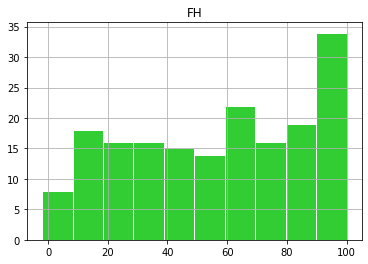

In [12]:
df.hist("FH", color = "limegreen", 
              edgecolor = "white")

Теперь построим гистограмму по группам – одна гистограмма для каждого региона. Для этого добавим аргумент `by` и впишем в него столбец, который отвечает за регион: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dc610d0>,
      dtype=object)

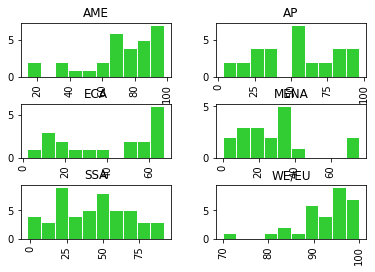

In [13]:
df.hist("FH", by = "Region", 
              color = "limegreen", 
              edgecolor = "white")

Всё здорово, но графики маленькие! Добавим опцию `figsize` для фиксирования размера картинок, здесь это 10 на 10 дюймов:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dfeba10>,
      dtype=object)

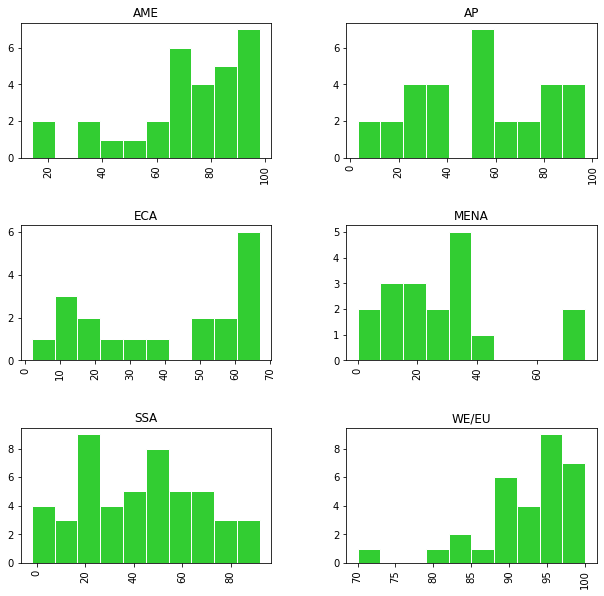

In [14]:
df.hist("FH", by = "Region", 
              color = "limegreen", 
              edgecolor = "white", figsize = (10, 10))

Ура! Теперь все графики вменяемого размера.

Попробуем сделать более сложную группировку – сгруппируем данные по региону и статусу страны сразу: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e1c1cd0>,
      dtype=object)

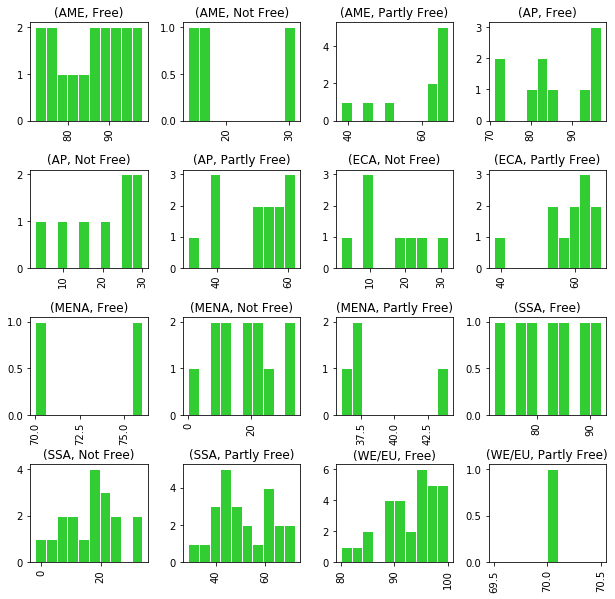

In [15]:
df.hist("FH", by = ["Region", "FH status"],
              color = "limegreen", 
              edgecolor = "white", figsize = (10, 10))

Не самый удачный вариант разбиения, так как некоторые группы получились совсем маленькими (один-два столбца на гистограмме), но самое главное – мы можем одной строчкой кода построить много графиков для данных с желаемой группировкой.

Давайте попробуем проделать то же самое с ящиками с усами!

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


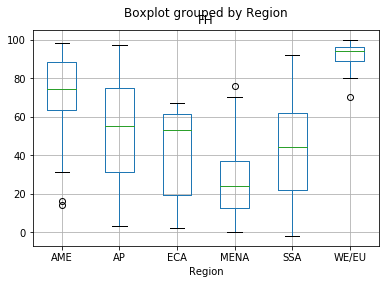

In [16]:
df.boxplot("FH", by = "Region")

Настраивать цвета для ящиков с усами не так просто, как для гистограмм, поэтому давайте просто уберём сетку, чтобы избавиться от лишних линий.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


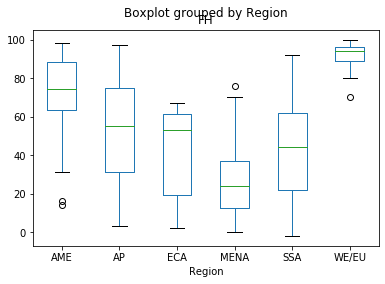

In [17]:
# grid = False – выключаем сетку (grid)

df.boxplot("FH", by = "Region", grid = False)